<a href="https://colab.research.google.com/github/omniaghazy/Machine-Learning-Algorithms/blob/main/logisticRegreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


            
           Logistic Regression Algorithm


import libraries files


In [1]:
import numpy as np
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [41]:
df = pd.read_csv("/content/DataLogisticRegression.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dataset overview

In [5]:
df.shape

(21913, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

The dataset 's columns :

DateThe — date of observation

Location — The common name of the location of the weather station

MinTemp — The minimum temperature in degrees celsius

MaxTemp — The maximum temperature in degrees celsius

Rainfall — The amount of rainfall recorded for the day in mm

Evaporation — The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine — The number of hours of bright sunshine in the day.

WindGustDir — The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed — The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am — Direction of the wind at 9am

WindDir3pm — Direction of the wind at 3pm

WindSpeed9am — Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm — Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am — Humidity (percent) at 9am

Humidity3pm — Humidity (percent) at 3pm

Pressure9am — Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm — Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am — Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear * sky whilst an 8 indicates that it is completely overcast.

Cloud3pm — Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

Temp9am — Temperature (degrees C) at 9am

Temp3pm — Temperature (degrees C) at 3pm

RainToday — Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RISK_MM — The amount of rain. A kind of measure of the "risk".

RainTomorrow — The target variable. Did it rain tomorrow?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21913 entries, 0 to 21912
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21913 non-null  object 
 1   Location       21912 non-null  object 
 2   MinTemp        21465 non-null  float64
 3   MaxTemp        21585 non-null  float64
 4   Rainfall       21411 non-null  float64
 5   Evaporation    7532 non-null   float64
 6   Sunshine       4889 non-null   float64
 7   WindGustDir    18229 non-null  object 
 8   WindGustSpeed  18231 non-null  float64
 9   WindDir9am     18932 non-null  object 
 10  WindDir3pm     20040 non-null  object 
 11  WindSpeed9am   21202 non-null  float64
 12  WindSpeed3pm   20523 non-null  float64
 13  Humidity9am    21421 non-null  float64
 14  Humidity3pm    20727 non-null  float64
 15  Pressure9am    18323 non-null  float64
 16  Pressure3pm    18327 non-null  float64
 17  Cloud9am       12175 non-null  float64
 18  Cloud3

In [8]:
df.describe(include= np.number)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,21465.000000,21585.000000,21411.000000,7532.000000,4889.000000,18231.000000,21202.000000,20523.000000,21421.000000,20727.000000,18323.000000,18327.000000,12175.000000,11863.000000,21564.000000,20876.000000
mean,13.034619,24.227413,2.627280,6.146455,8.122909,37.643794,12.366994,16.598207,69.243313,51.314952,1018.236713,1015.590582,4.129446,4.341988,17.881502,22.731912
std,5.988752,6.319165,9.747049,5.258340,3.760336,13.115046,9.046144,9.191041,18.086417,21.432790,6.574368,6.501194,3.032896,2.755255,5.580316,6.155668
min,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.500000,19.500000,0.000000,3.000000,5.800000,28.000000,6.000000,9.000000,57.000000,35.000000,1013.800000,1011.200000,1.000000,1.000000,13.900000,18.100000
50%,13.500000,23.700000,0.000000,4.850000,9.300000,35.000000,11.000000,15.000000,70.000000,52.000000,1018.300000,1015.600000,4.000000,5.000000,18.300000,22.100000
75%,17.900000,28.200000,0.600000,8.000000,10.900000,44.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.000000,7.000000,7.000000,22.000000,26.600000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000


In [9]:
df.describe(include=object)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,21913,21912,18229,18932,20040,21411,21411
unique,3041,8,16,16,16,2,2
top,1/1/2009,Albury,NNE,SW,SE,No,No
freq,8,3040,1722,2121,2100,16813,16812


Data Preprocessing


 null values

In [10]:
data_null = pd.Series(index =df.columns)

for col in df:
  data_null[col] = df[col].count()/df.shape[0]*100

data_null

,0
Date,100.000000
Location,99.995436
MinTemp,97.955551
MaxTemp,98.503172
Rainfall,97.709122
Evaporation,34.372290
Sunshine,22.310957
WindGustDir,83.188062
WindGustSpeed,83.197189
WindDir9am,86.396203


In [11]:
data_null.sort_values(ascending=False)

,0
Date,100.000000
Location,99.995436
MaxTemp,98.503172
Temp9am,98.407338
MinTemp,97.955551
Humidity9am,97.754757
Rainfall,97.709122
RainToday,97.709122
RainTomorrow,97.709122
WindSpeed9am,96.755351


<Axes: >

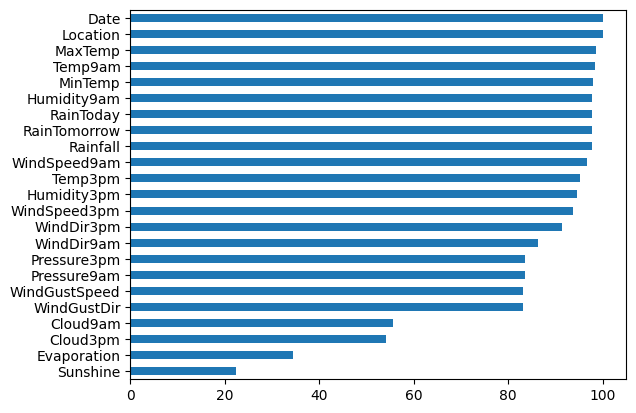

In [12]:
data_null.sort_values().plot(kind='barh')

In [13]:
df = df.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine'])

In [14]:
(df.isna().sum()/df.shape[0])*100

,0
Date,0.000000
Location,0.004564
MinTemp,2.044449
MaxTemp,1.496828
Rainfall,2.290878
WindGustDir,16.811938
WindGustSpeed,16.802811
WindDir9am,13.603797
WindDir3pm,8.547438
WindSpeed9am,3.244649


In [15]:
df.select_dtypes(include=object).nunique()

,0
Date,3041
Location,8
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [16]:
df.select_dtypes(exclude=object).nunique()

,0
MinTemp,321
MaxTemp,374
Rainfall,414
WindGustSpeed,58
WindSpeed9am,39
WindSpeed3pm,39
Humidity9am,97
Humidity3pm,100
Pressure9am,410
Pressure3pm,413


In [ ]:
df.groupby('RainTomorrow')['Location'].value_counts()

In [24]:
df.groupby('Location')['RainTomorrow'].value_counts()

Location       RainTomorrow
Albury         No              2393
               Yes              618
BadgerysCreek  No              2345
               Yes              583
Cobar          No              2602
               Yes              386
CoffsHarbour   No              2084
               Yes              869
Moree          No              2460
               Yes              394
Newcastle      No              2224
               Yes              731
NorahHead      No              2121
               Yes              808
NorfolkIsland  No               583
               Yes              210
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow,Location'>

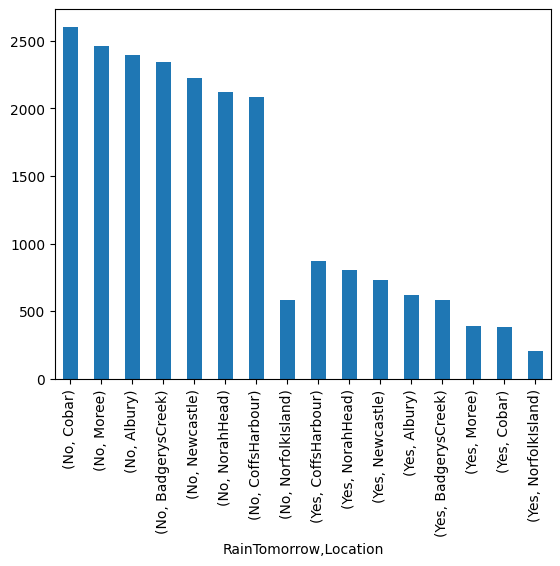

In [25]:
df.groupby('RainTomorrow')['Location'].value_counts().plot(kind='bar')

In [26]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [27]:
# for col in df.columns:
#   if col in num_cols:
#     df[col] = df[col].fillna(df[col].mean())
#   else:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
# df.RainToday = df.RainToday.map({'Yes':1,'No':0})
# df.RainTomorrow = df.RainTomorrow.map({'Yes':1,'No':0})

In [29]:
df.duplicated().sum()

np.int64(0)

EDA and visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_val_data , test_data = train_test_split(df,test_size=0.2,random_state=0)
train_df, valid_df = train_test_split(train_val_data ,test_size=0.2,random_state=0)

In [44]:
features = list(train_df.columns)[1:-1]
target = "RainTomorrow"


In [45]:
train_inputs = train_df[features].copy()
train_targets = train_df[target].copy()
valid_inputs = valid_df[features].copy()
valid_targets = valid_df[target].copy()
test_data_inputs = test_data[features].copy()
test_data_targets = test_data[target].copy()

In [46]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes(exclude=np.number).columns.tolist()

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

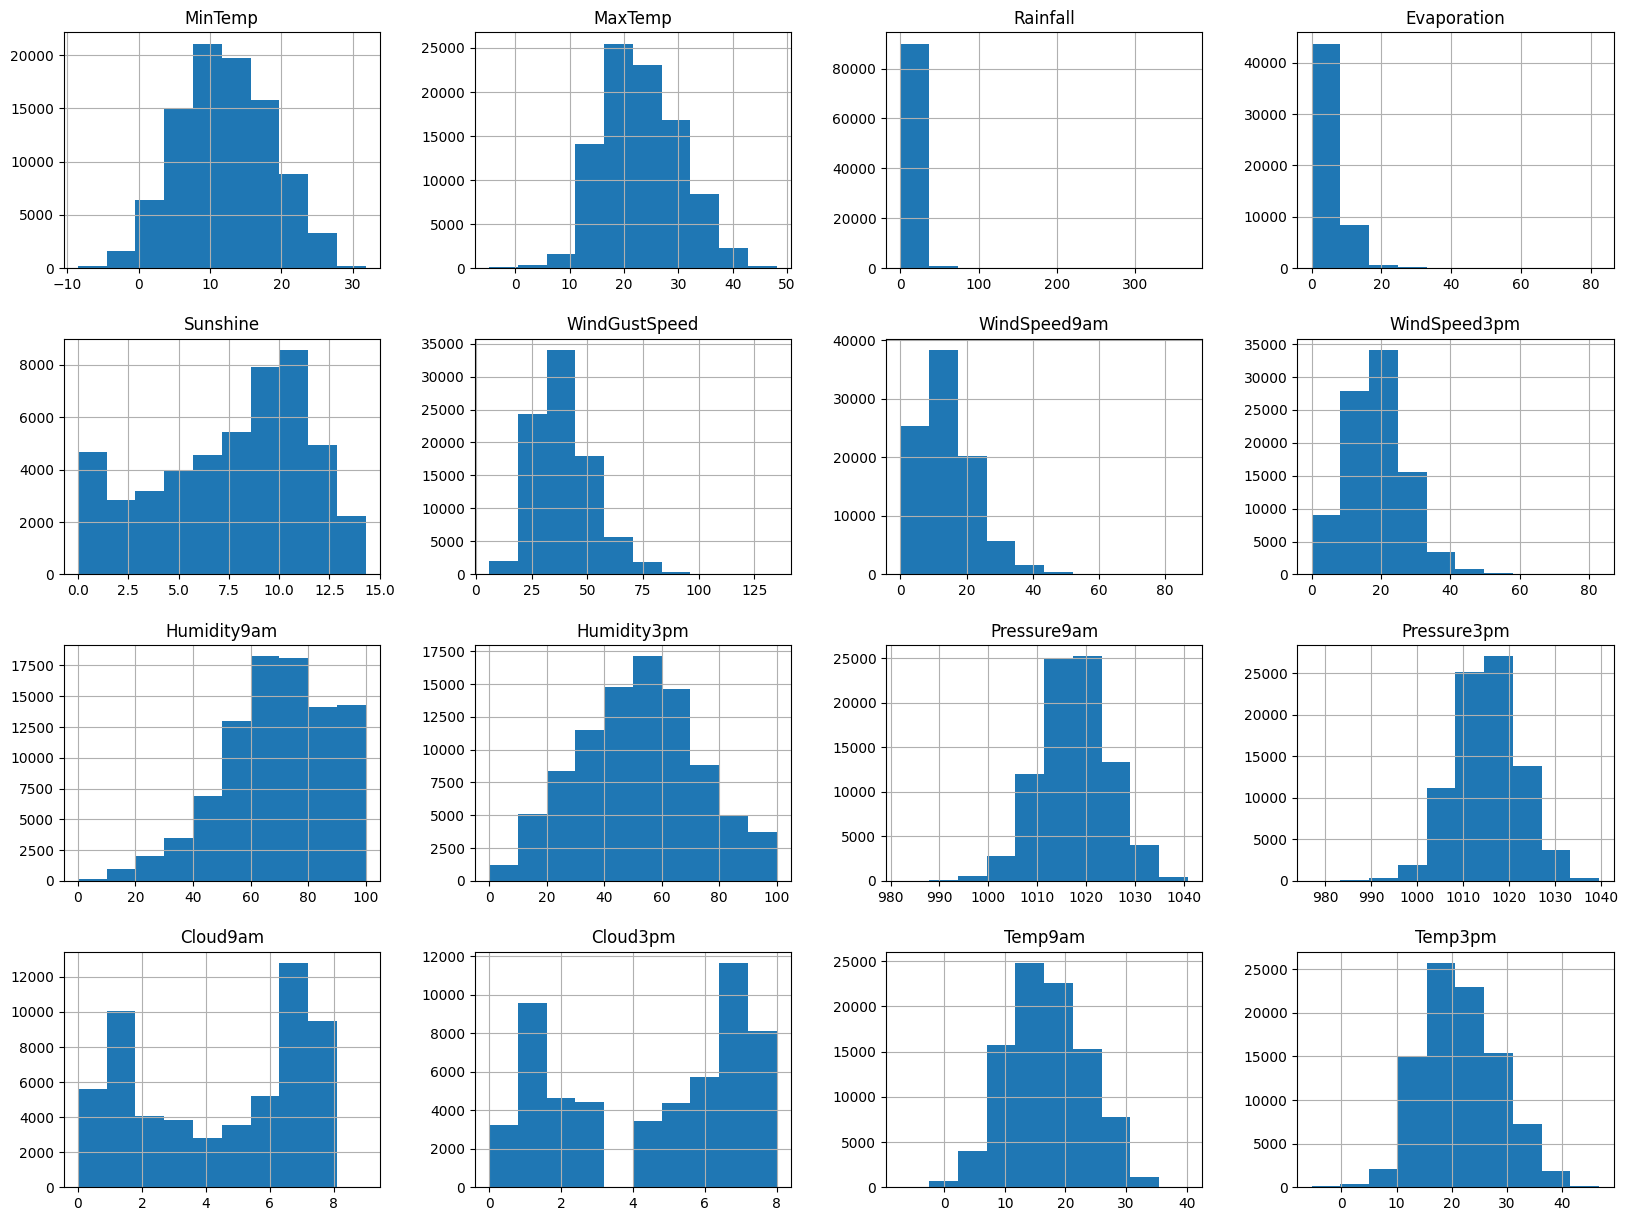

In [47]:
train_inputs[numeric_cols].hist(figsize=(20,15))

In [50]:
from sklearn.impute import SimpleImputer
imputer_numerical=SimpleImputer(strategy='mean')
imputer_categorical=SimpleImputer(strategy='most_frequent')
imputer_numerical.fit(df[numeric_cols])
imputer_categorical.fit(df[cat_cols])


SimpleImputer(strategy='most_frequent')

In [51]:
train_inputs[numeric_cols] = imputer_numerical.transform(train_inputs[numeric_cols])
train_inputs[cat_cols] = imputer_categorical.transform(train_inputs[cat_cols])
valid_inputs[numeric_cols] = imputer_numerical.transform(valid_inputs[numeric_cols])
valid_inputs[cat_cols] = imputer_categorical.transform(valid_inputs[cat_cols])
test_data_inputs[numeric_cols] = imputer_numerical.transform(test_data_inputs[numeric_cols])


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])


MinMaxScaler()

In [53]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
valid_inputs[numeric_cols] = scaler.transform(valid_inputs[numeric_cols])
test_data_inputs[numeric_cols] = scaler.transform(test_data_inputs[numeric_cols])

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output =False,handle_unknown='ignore')
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [59]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [60]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
valid_inputs[encoded_cols] = encoder.transform(valid_inputs[cat_cols])
test_data_inputs[encoded_cols] = encoder.transform(test_data_inputs[cat_cols])

In [61]:
from sklearn.linear_model import LogisticRegression
train_inputs = train_inputs.fillna(0)
train_targets = train_targets.fillna(train_targets.mode()[0])



In [62]:
model = LogisticRegression(solver = "liblinear")
model.fit(train_inputs[numeric_cols + encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

In [63]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_valid = valid_inputs[numeric_cols + encoded_cols]
x_test  = test_data_inputs[numeric_cols + encoded_cols]


In [64]:
train_pred = model.predict(x_train)


In [66]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(train_targets,train_pred)
train_accuracy

0.8484649923733001